# Bin Packing Lab

- Authors:
  - Sevhena Walker, walkes31@mcmaster.ca
  - Mohamad-Hassan Bahsoun, bahsounm@mcmaster.ca
- Group ID on Avenue: group 52
- Gitlab URL: https://gitlab.cas.mcmaster.ca/walkes31/l2-bin-packing

#### Notes about this lab

##### Contribution

- Sevhena: j

- Hassan: It is important to note that Hassan's git push command would not work.

##### Other

- k

## Understand The Code Base

#### Solid Principles
S - In terms of how the code follows the single-responsability principle, each class and function serves one purpose.

O - The design follows the open/closed principle as more components can be added to the code without modifying existing components. This is easily seen in the bin packer design where you have different types of bin packers (offline, online) and there could possibly be more in the future if such a thing was wanted.

L - The design follows the Liskov Substituion principle since all dependent classes can be used in place of their superclasses without any erors occuring. Any overrides seen in the algorithms for the offline and online binpackers do not make any significant changes.

I - This design clearly follows interface segragation by the use of the BinPacker interface. This allows for the initalizing of different types of bin packers (offline, online) that still follow the same baseline.

D - In the code design there are multiple classes that depend on abstract classes (BinppReader depends on DatasetReader, NextFit has two versions that each depend on an online and offline version of the Binpacker interface) Any changes made to these subclasses won't affect the superclass. If any changes need to be made to any of the methods of the superclasse, then there only need to be an override method initialized in the subclass.

#### Dataset Comprehension

The files found in the prefixed *binpp* folders follow the same format. The first line in each file gives the number *n* of weighted items in the file. The second line gives the max capacity *c* of the bins and the rest of the file is simply the n individual items listed by their respective weights.

The files in the *jburkardt* come in triples with a file ending in *_c*, *_s* and *_w*. The *_c* file gives the capacity of the bins, the *_s* file matches up with the *_w* file as they have the same number of data values. Each line of the *_s* file says how many items of the weight in the *_w* are to be packed. 

#### Reading jburkardt Files

In [1]:
from macpacking.reader import DatasetReader, JburkardtReader

In [2]:
dataset_c = '_datasets/jburkardt/p04_c.txt'
dataset_s = '_datasets/jburkardt/p04_s.txt'
dataset_w = '_datasets/jburkardt/p04_w.txt'
reader: DatasetReader = JburkardtReader(dataset_c, dataset_s, dataset_w)
print(f'Dataset: {dataset_c}')
print(f'Dataset: {dataset_s}')
print(f'Dataset: {dataset_w}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/jburkardt/p04_c.txt
Dataset: _datasets/jburkardt/p04_s.txt
Dataset: _datasets/jburkardt/p04_w.txt
  - Bin Capacity: 524
  - Objects to pack: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 46, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 442]


#### The Worst Bin Packing Algorithm To Ever Exist

In [3]:
from macpacking.model import Online
import macpacking.algorithms.online as online

In [4]:
strategy: Online = online.BadFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 138
[[9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [12], [12], [12], [37], [37], [37], [37], [37], [37], [37], [37], [37], [37], [37], [37], [37], [46], [84], [84], [84], [84], [84], [84], [84], [85], [85], [85], [85], [85], [85], [85], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [106], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [127], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [252], [442]]


## Implement And Benchmark Algorithms

#### More Data

In [5]:
from macpacking.reader import BinppReader

In [6]:
# dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
# reader: DatasetReader = BinppReader(dataset)
# print(f'Dataset: {dataset}')
# print(f'  - Bin Capacity: {reader.offline()[0]}')
# print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

In [7]:
# dataset = '_datasets/binpp-hard/HARD0.BPP.txt'
# reader: DatasetReader = BinppReader(dataset)
# print(f'Dataset: {dataset}')
# print(f'  - Bin Capacity: {reader.offline()[0]}')
# print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

#### Online Algorithms

In [8]:
from macpacking.model  import Offline, Multiway
import macpacking.algorithms.offline as offline

In [9]:
on_func_input = reader.online()

##### **Next Fit**

In [10]:
strategy: Online = online.NextFit()
result = strategy(on_func_input)
count: int = strategy.counting_compares()
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(count)

nb_bins = 33
[[37, 37, 106, 37, 10, 127], [84, 10, 85, 10, 84, 9, 127, 106], [84, 10, 106, 252], [84, 127, 106], [106, 9, 9, 106, 106, 84, 85], [106, 10, 10, 252, 106, 10], [106, 37, 84, 9, 252, 9], [106, 106, 85, 106, 85], [106, 106, 106], [106, 127, 10, 127, 127], [127, 37, 106, 84, 37, 85, 46], [127, 37, 106, 106, 106], [127, 85, 85, 127, 9], [127, 127, 127, 10, 127], [127, 127, 252], [127, 252, 127, 10], [252, 9, 252], [252, 10, 10, 127, 10], [252, 10, 127, 106, 10], [252, 12, 37], [252, 37], [252, 37, 12, 10], [252, 106, 9], [252, 106, 106], [252, 106, 106], [252, 127], [252, 127], [252, 127, 10, 127], [252, 127, 37, 9], [252, 127, 37, 10], [252, 127, 127], [252, 252, 12], [442, 37, 9]]
138


##### **First Fit**

In [11]:
strategy: Online = online.FirstFit()
result = strategy(on_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 1
[[]]


##### **Refined First Fit**

In [12]:
strategy: Online = online.RefinedFirstFit()
result = strategy(on_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 0
[]


##### **Best Fit**

In [13]:
strategy: Online = online.BestFit()
result = strategy(on_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 1
[[]]


##### **Worst Fit**

In [14]:
strategy: Online = online.WorstFit()
result = strategy(on_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 1
[[]]


#### Offline Algorithms

In [15]:
off_func_input = reader.offline()

##### **Ben Maier Fit**

In [16]:
import macpacking.algorithms.baseline as baseline

strategy: Offline = baseline.BenMaier()
result = strategy(off_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 29
[[37, 37, 37, 37], [84, 84, 84, 84, 37, 37, 37, 37, 37], [106, 85, 84, 84, 84, 37, 37], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 12], [106, 106, 106, 106, 85, 12], [127, 127, 106, 106, 46, 12], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [252, 127, 127, 10], [252, 252], [252, 252], [252, 252, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 10, 9], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [442, 37, 37]]


##### **Next Fit Decreasing**

In [17]:
strategy: Offline = offline.NextFit()
result = strategy(off_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [84, 84, 84, 84, 46, 37, 37, 37], [85, 85, 85, 84, 84, 84], [106, 85, 85, 85, 85], [106, 106, 106, 106], [106, 106, 106, 106], [106, 106, 106, 106], [106, 106, 106, 106], [106, 106, 106, 106], [106, 106, 106, 106], [127, 127, 106, 106], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [252, 127, 127], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [442]]


##### **First Fit Decreasing**

In [18]:
strategy: Offline = offline.FirstFitDecreasing()
result = strategy(off_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 30
[[37], [84, 37], [85, 84, 84, 84, 37, 37, 37, 37, 37], [106, 85, 84, 84, 84, 37, 37], [106, 106, 106, 106, 85], [106, 106, 106, 106, 85], [106, 106, 106, 106, 85], [106, 106, 106, 106, 85], [106, 106, 106, 106, 85], [127, 106, 106, 106, 37, 37], [127, 106, 106, 106, 37, 37], [127, 127, 127, 127], [127, 127, 127, 127, 9], [127, 127, 127, 127, 9], [127, 127, 127, 127, 9], [127, 127, 127, 127, 9], [127, 127, 127, 127, 9], [252, 127, 127, 9, 9], [252, 252, 9, 9], [252, 252, 10, 9], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 12], [442, 46, 12, 12, 10]]


##### **Best Fit Decreasing**

In [19]:
strategy: Offline = offline.BestFitDecreasing()
result = strategy(off_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 30
[[37], [84, 37], [85, 84, 84, 84, 37, 37, 37, 37, 37], [106, 85, 84, 84, 84, 37, 37], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 10], [106, 106, 106, 106, 85, 12], [106, 106, 106, 106, 85, 12], [106, 106, 106, 106, 85, 12], [127, 106, 106, 106, 37, 37], [127, 106, 106, 106, 46], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [127, 127, 127, 127, 10], [252, 127, 127, 10], [252, 252], [252, 252, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 9, 9], [252, 252, 10, 9], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [442, 37, 37]]


##### **Worst Fit Decreasing**

In [20]:
strategy: Offline = offline.WorstFitDecreasing()
result = strategy(off_func_input)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 30
[[37], [84, 37, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [85, 84, 84, 84, 46, 37, 37, 37], [106, 85, 84, 84, 84, 37, 37], [106, 106, 106, 106, 85], [106, 106, 106, 106, 85], [106, 106, 106, 106, 85], [106, 106, 106, 106, 85], [106, 106, 106, 106, 85], [127, 106, 106, 106, 37, 37], [127, 106, 106, 106, 37, 37], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [127, 127, 127, 127], [252, 127, 127], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [252, 252], [442, 37, 37]]


#### **KPIs**

Bin space not used: 1048

[516, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 506, 508, 508, 508, 508, 508, 508, 519, 519, 509, 509, 509, 509, 509, 517, 494, 427, 37]


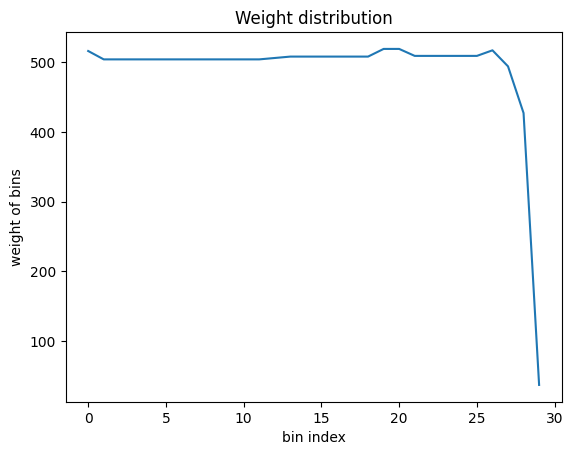

In [21]:
from kpis import wasted_space, weight_distribution

print(f'Bin space not used: {wasted_space(off_func_input[0], result)}\n')

weight_distribution(result)

#### **Benchmarking For Classical Algorithms**

In [22]:
from pyperf import BenchmarkSuite
from os.path import exists

bench_datafile = 'outputs/bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [23]:
!{'python -m pyperf hist outputs/bench.json'}

N4C2W2_A.BPP.txt offline NF_Off

155 us:  4 ##########
157 us: 27 ####################################################################
159 us: 16 ########################################
161 us:  5 #############
163 us:  5 #############
165 us:  2 #####
168 us:  0 |
170 us:  0 |
172 us:  0 |
174 us:  0 |
176 us:  0 |
178 us:  0 |
180 us:  0 |
182 us:  0 |
184 us:  0 |
186 us:  0 |
188 us:  0 |
190 us:  0 |
192 us:  0 |
194 us:  0 |
196 us:  0 |
199 us:  1 ###

N4C2W2_A.BPP.txt offline FFDesc

8.07 ms:  1 #######
8.12 ms:  1 #######
8.16 ms:  3 ####################
8.20 ms:  5 ##################################
8.24 ms:  5 ##################################
8.29 ms:  8 ######################################################
8.33 ms:  5 ##################################
8.37 ms: 10 ###################################################################
8.41 ms:  8 ######################################################
8.46 ms:  4 ###########################
8.50 ms:  3 ####################
8

In [24]:
def extract_benchmark_algos(file: str) -> set[str]:
    suite = BenchmarkSuite.load(file)
    context = suite.get_benchmark_names()
    return set(map(lambda c: c.split('-')[0], context))

In [25]:
files = extract_benchmark_algos(bench_datafile)
print(files)

{'HARD9.BPP.txt offline NF_Off', 'HARD0.BPP.txt online BF', 'N4C2W2_O.BPP.txt online BF', 'HARD8.BPP.txt offline NF_Off', 'N2C3W4_G.BPP.txt offline FFDesc', 'N4C2W2_R.BPP.txt offline NF_Off', 'HARD8.BPP.txt online FF', 'N4C2W2_N.BPP.txt offline WFDesc', 'HARD4.BPP.txt online WF', 'p01 online BF', 'N2C3W4_M.BPP.txt offline WFDesc', 'p01 online FF', 'N4C2W2_M.BPP.txt online BF', 'N4C2W2_L.BPP.txt offline BFDesc', 'N4C2W2_C.BPP.txt online WF', 'HARD2.BPP.txt offline BFDesc', 'HARD4.BPP.txt online BF', 'N2C3W4_D.BPP.txt offline NF_Off', 'HARD5.BPP.txt offline FFDesc', 'N4C2W2_D.BPP.txt online FF', 'N2C3W4_D.BPP.txt online WF', 'N4C2W2_F.BPP.txt offline BFDesc', 'N2C3W4_H.BPP.txt offline BFDesc', 'HARD5.BPP.txt offline BFDesc', 'N2C3W4_K.BPP.txt online WF', 'p01 offline BFDesc', 'N2C3W4_O.BPP.txt offline BFDesc', 'N2C3W4_P.BPP.txt offline WFDesc', 'N2C3W4_P.BPP.txt online FF', 'N4C2W2_B.BPP.txt offline NF_Off', 'N4C2W2_S.BPP.txt offline FFDesc', 'HARD8.BPP.txt offline WFDesc', 'HARD8.BPP.tx

In [26]:
def load_bench_measurements(name: str, json_filename: str) -> list[float]:
    """extract the values for a given benchmark"""
    suite = BenchmarkSuite.load(json_filename)
    bench = suite.get_benchmark(name)
    return list(bench.get_values())

In [27]:
Next_Fit_off_vals = []; Next_Fit_on_vals = []
First_Fit_off_vals = []; First_Fit_on_vals = []
RFF_on_vals = []
Best_Fit_off_vals = []; Best_Fit_on_vals = []
Worst_Fit_off_vals = []; Worst_Fit_on_vals = []
baseline_vals = []

In [28]:
for file in files:
    #print(file)
    name = file.split()[2]
    #print(name)
    match name:
        case 'NF_Off':
            Next_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'NF_On':
            Next_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'FFDesc':
            First_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'FF':
            First_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'RFF':
            RFF_on_vals += load_bench_measurements(file, bench_datafile)
        case 'BFDesc':
            Best_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'BF':
            Best_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'WFDesc':
            Worst_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'WF':
            Worst_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'BenMaier':
            baseline_vals += load_bench_measurements(file, bench_datafile)
        case _:
            raise ValueError(name)

#### **Plot the Benchmark**

In [29]:
from matplotlib import pyplot as plt

def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='exec time (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

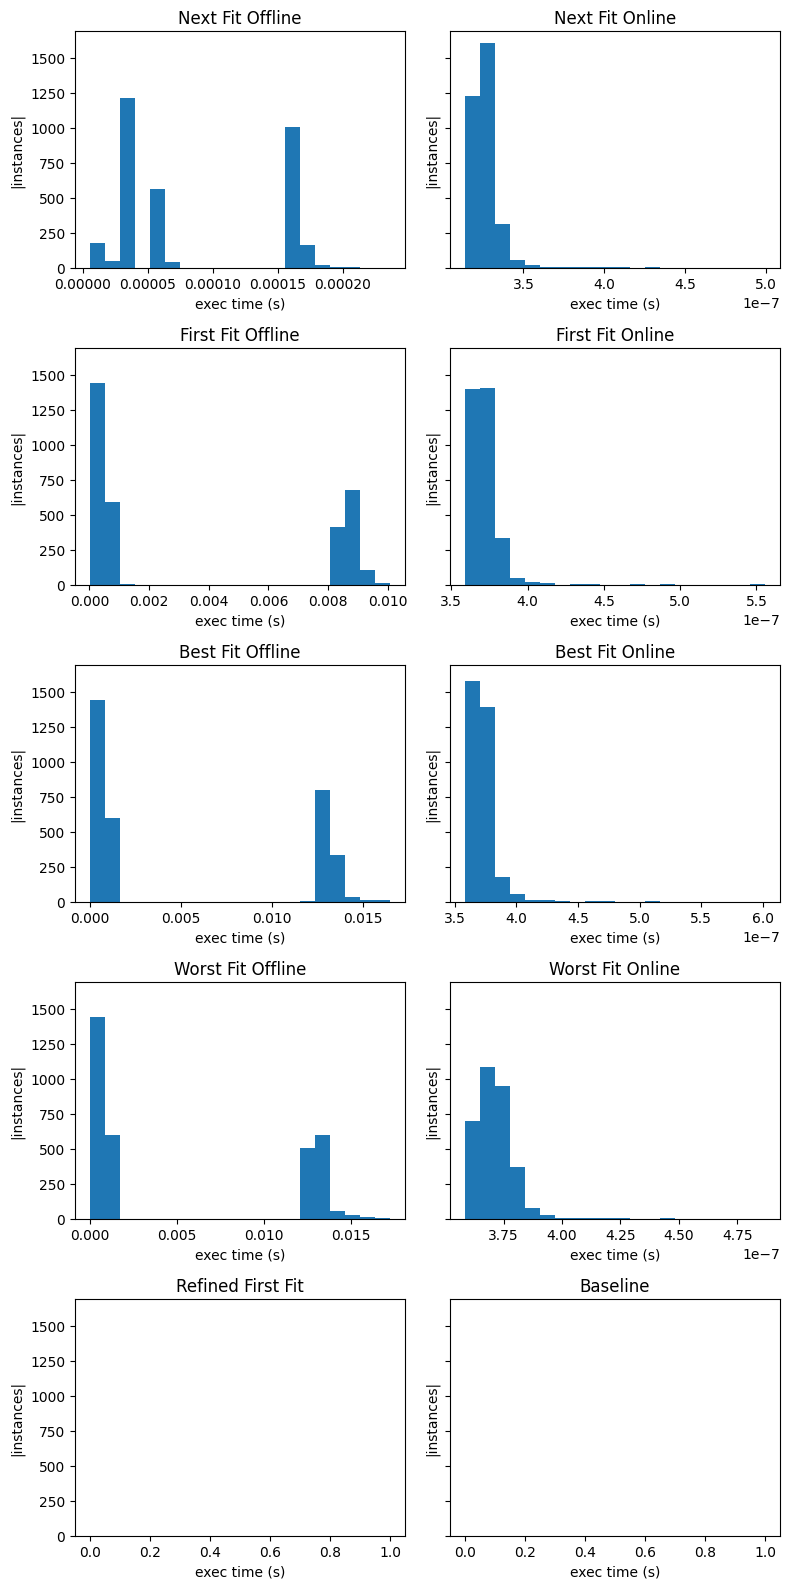

In [30]:
fig, axes = plt.subplots(5,2, sharex = False, sharey= True)
draw_hist(Next_Fit_off_vals, "Next Fit Offline", axes[0, 0]) 
draw_hist(Next_Fit_on_vals, "Next Fit Online", axes[0, 1]) 
draw_hist(First_Fit_off_vals, "First Fit Offline", axes[1, 0])
draw_hist(First_Fit_on_vals, "First Fit Online", axes[1, 1])
draw_hist(Best_Fit_off_vals, "Best Fit Offline", axes[2, 0])
draw_hist(Best_Fit_on_vals, "Best Fit Online", axes[2, 1])
draw_hist(Worst_Fit_off_vals, "Worst Fit Offline", axes[3, 0])
draw_hist(Worst_Fit_on_vals, "Worst Fit Online", axes[3, 1])
draw_hist(RFF_on_vals, "Refined First Fit", axes[4, 0])
draw_hist(baseline_vals, "Baseline", axes[4, 1])
fig.set_size_inches(8,16)
fig.tight_layout()
fig.savefig('outputs/histogram_classic.pdf')

In [31]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

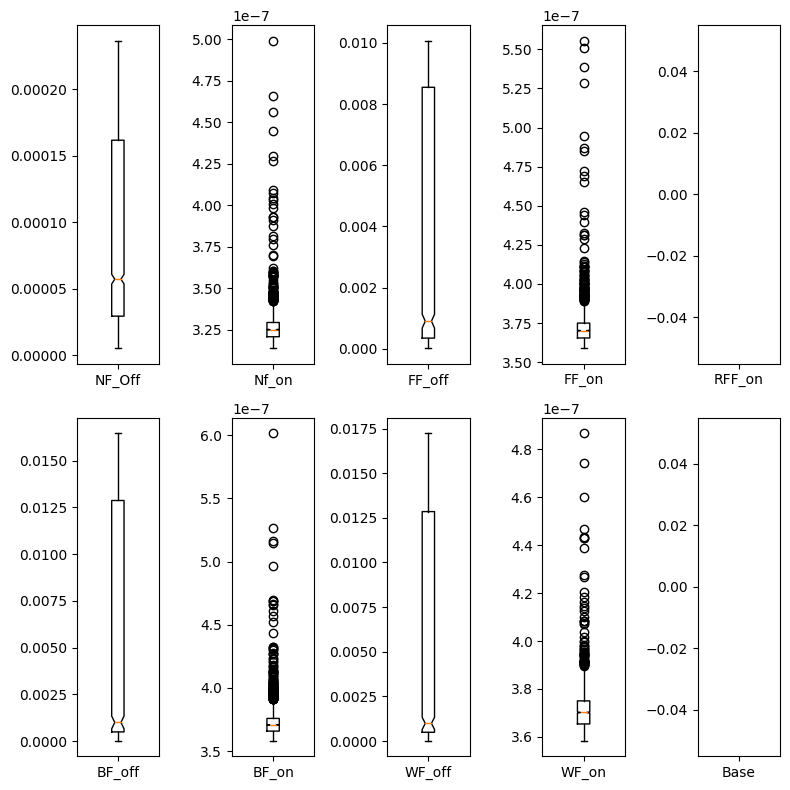

In [32]:
fig, ax = plt.subplots(2,5)

plot_box([Next_Fit_off_vals],['NF_Off'], ax[0, 0])
plot_box([Next_Fit_on_vals],['Nf_on'], ax[0, 1])
plot_box([First_Fit_off_vals],['FF_off'], ax[0, 2])
plot_box([First_Fit_on_vals],['FF_on'], ax[0, 3])
plot_box([RFF_on_vals],['RFF_on'], ax[0, 4])
plot_box([Best_Fit_off_vals],['BF_off'], ax[1, 0])
plot_box([Best_Fit_on_vals],['BF_on'], ax[1, 1])
plot_box([Worst_Fit_off_vals],['WF_off'], ax[1, 2])
plot_box([Worst_Fit_on_vals],['WF_on'], ax[1, 3])
plot_box([baseline_vals],['Base'], ax[1, 4])

fig.set_size_inches(8,8)
fig.tight_layout()
fig.savefig('outputs/boxplot_classic.pdf')

#### **Analysis**

## Measure Improvement Margin

In [48]:
from os.path import exists
from statistics import median, quantiles
from json import load

datafile = 'outputs/optimal_vals.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [49]:
data = None

with open(datafile, 'r') as openfile:
    data = load(openfile)

In [50]:
NF_off_vals = []; NF_on_vals = []
FF_off_vals = []; FF_on_vals = []
RFF_on_vals = [4,5,3,5,6]
BF_off_vals = []; BF_on_vals = []
WF_off_vals = []; WF_on_vals = []
BenMaier_vals = []

In [51]:
for name in data.keys():
    match name.split()[1]:
        case 'NF_Off':
            NF_off_vals.append(data[name])
        case 'NF_On':
            NF_on_vals.append(data[name])
        case 'FFDesc':
            FF_off_vals.append(data[name])
        case 'FF':
            FF_on_vals.append(data[name])
        case 'RFF':
            RFF_on_vals.append(data[name])
        case 'BFDesc':
            BF_off_vals.append(data[name])
        case 'BF':
            BF_on_vals.append(data[name])
        case 'WFDesc':
            WF_off_vals.append(data[name])
        case 'WF':
            WF_on_vals.append(data[name])
        case 'BenMaier':
            BenMaier_vals.append(data[name])
        case _:
            raise ValueError(data[name])

In [52]:
def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='bin diff (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

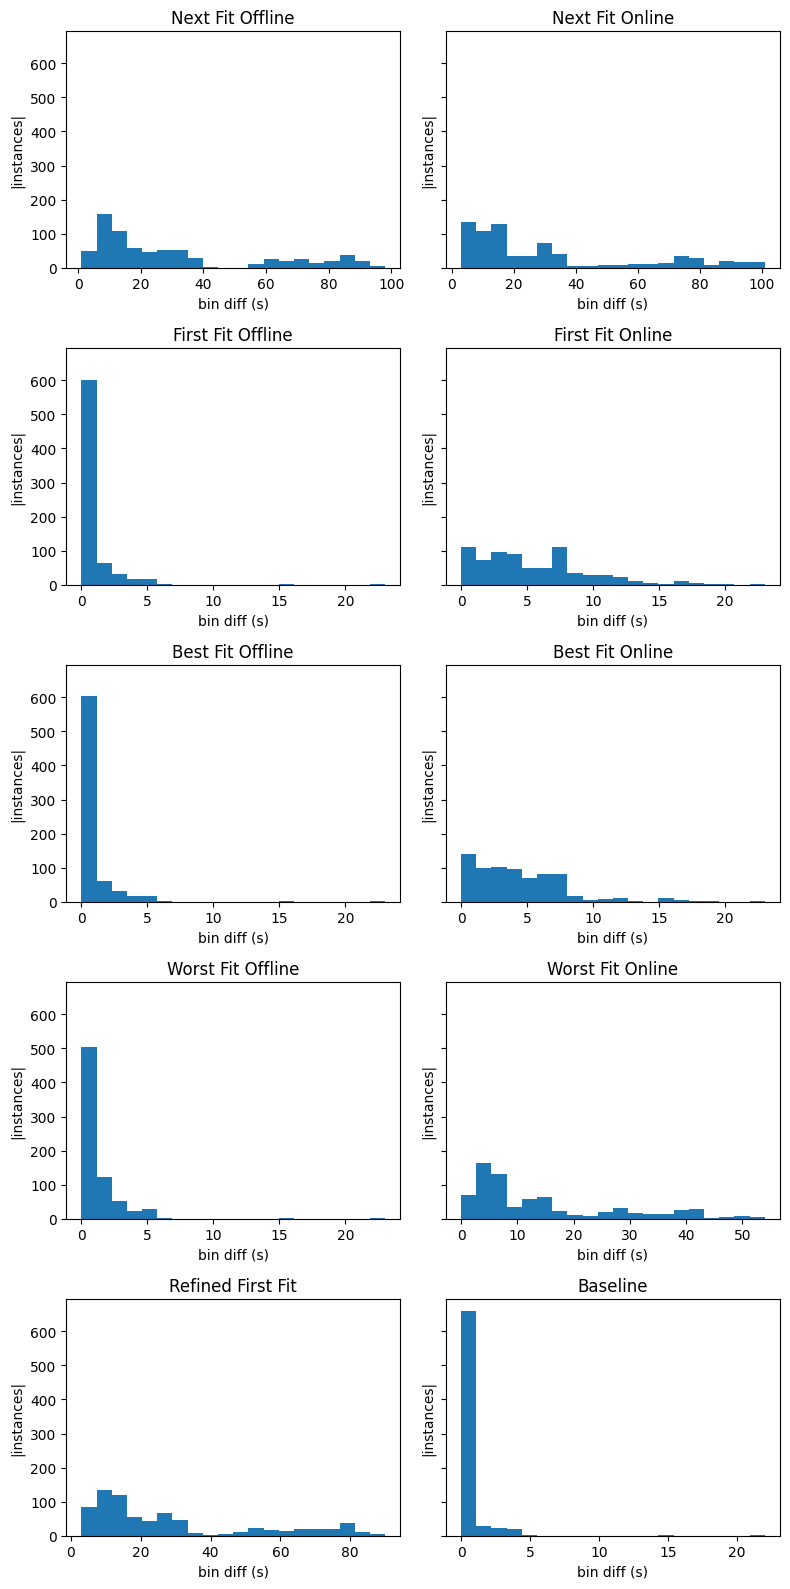

In [53]:
fig, axes = plt.subplots(5,2, sharex = False, sharey= True)
draw_hist(NF_off_vals, "Next Fit Offline", axes[0, 0]) 
draw_hist(NF_on_vals, "Next Fit Online", axes[0, 1]) 
draw_hist(FF_off_vals, "First Fit Offline", axes[1, 0])
draw_hist(FF_on_vals, "First Fit Online", axes[1, 1])
draw_hist(BF_off_vals, "Best Fit Offline", axes[2, 0])
draw_hist(BF_on_vals, "Best Fit Online", axes[2, 1])
draw_hist(WF_off_vals, "Worst Fit Offline", axes[3, 0])
draw_hist(WF_on_vals, "Worst Fit Online", axes[3, 1])
draw_hist(RFF_on_vals, "Refined First Fit", axes[4, 0])
draw_hist(BenMaier_vals, "Baseline", axes[4, 1])
fig.set_size_inches(8,16)
fig.tight_layout()
fig.savefig('outputs/histogram_optimal.pdf')

In [54]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

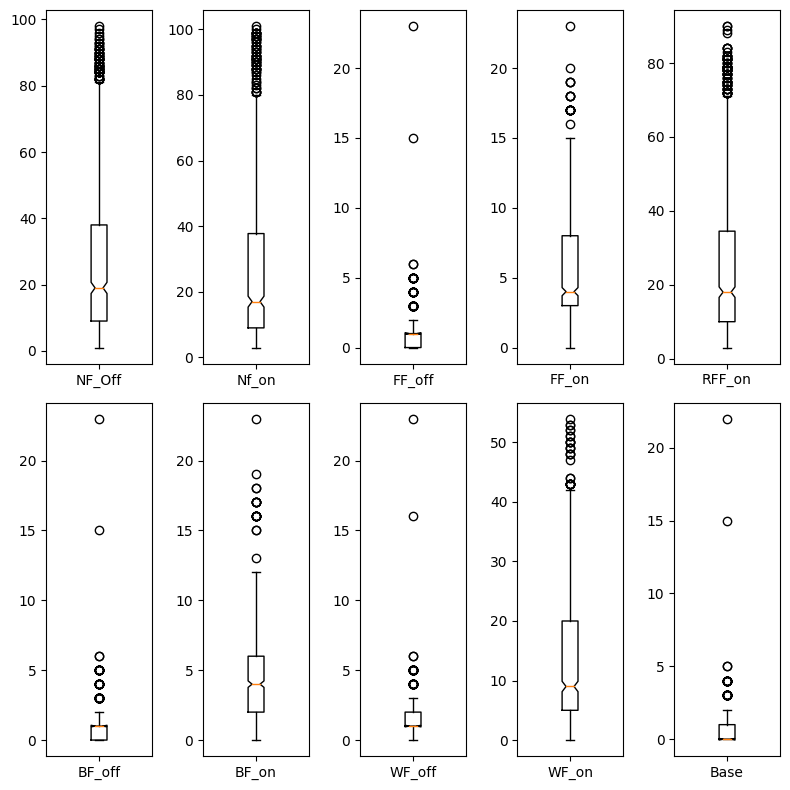

In [55]:
fig, ax = plt.subplots(2,5)

plot_box([NF_off_vals],['NF_Off'], ax[0, 0])
plot_box([NF_on_vals],['Nf_on'], ax[0, 1])
plot_box([FF_off_vals],['FF_off'], ax[0, 2])
plot_box([FF_on_vals],['FF_on'], ax[0, 3])
plot_box([RFF_on_vals],['RFF_on'], ax[0, 4])
plot_box([BF_off_vals],['BF_off'], ax[1, 0])
plot_box([BF_on_vals],['BF_on'], ax[1, 1])
plot_box([WF_off_vals],['WF_off'], ax[1, 2])
plot_box([WF_on_vals],['WF_on'], ax[1, 3])
plot_box([BenMaier_vals],['Base'], ax[1, 4])

fig.set_size_inches(8,8)
fig.tight_layout()
fig.savefig('outputs/boxplot_optimal.pdf')

In [56]:

def outlier_vals(data):
    values = data
    q1 = quantiles(values, method='inclusive')[0]
    
    # finding the 3rd quartile
    q3 = quantiles(values, method='inclusive')[2]
    med = median(values)
    
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    return (upper_bound, lower_bound)

https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

In [57]:
NF_off_outliers = []; NF_on_outliers = []
FF_off_outliers = []; FF_on_outliers = []; RFF_outliers = []
BF_off_outliers = []; BF_on_outliers = []
WF_off_outliers = []; WF_on_outliers = []
BenMaier_outliers = []

all_outliers = set()

NF_off_bounds = outlier_vals(NF_off_vals); NF_on_bounds = outlier_vals(NF_on_vals)
FF_off_bounds = outlier_vals(FF_off_vals); FF_on_bounds = outlier_vals(FF_on_vals); RFF_bounds = outlier_vals(RFF_on_vals)
BF_off_bounds = outlier_vals(BF_off_vals); BF_on_bounds = outlier_vals(BF_on_vals)
WF_off_bounds = outlier_vals(WF_off_vals); WF_on_bounds = outlier_vals(WF_on_vals)
BenMaier_bounds = outlier_vals(BenMaier_vals)

In [58]:
for name in data.keys():
    val = data[name]
    if val < 10:
        continue
    match name.split()[1]:
        case 'NF_Off':
            if val > NF_off_bounds[0] or val < NF_off_bounds[1]:
                NF_off_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'NF_On':
            if val > NF_on_bounds[0] or val < NF_on_bounds[1]:
                NF_on_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'FFDesc':
            if val > FF_off_bounds[0] or val < FF_off_bounds[1]:
                FF_off_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'FF':
            if val > FF_on_bounds[0] or val < FF_on_bounds[1]:
                FF_on_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'RFF':
            if val > RFF_bounds[0] or val < RFF_bounds[1]:
                RFF_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'BFDesc':
            if val > BF_off_bounds[0] or val < BF_off_bounds[1]:
                BF_off_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'BF':
            if val > BF_on_bounds[0] or val < BF_on_bounds[1]:
                BF_on_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'WFDesc':
            if val > WF_off_bounds[0] or val < WF_off_bounds[1]:
                WF_off_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'WF':
            if val > WF_on_bounds[0] or val < WF_on_bounds[1]:
                WF_on_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'BenMaier':
            if val > BenMaier_bounds[0] or val < BenMaier_bounds[1]:
                BenMaier_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case _:
            raise ValueError(data[name])

In [59]:
print(f'All outliers: {sorted(all_outliers)}\n')
print(f'Next Fit offline outliers: {sorted(NF_off_outliers)}\n')
print(f'Next Fit online outliers: {sorted(NF_on_outliers)}\n')
print(f'First Fit offline outliers: {sorted(FF_off_outliers)}\n')
print(f'First Fit online outliers: {sorted(FF_on_outliers)}\n')
print(f'Refined First Fit outliers: {sorted(RFF_outliers)}\n')
print(f'Best Fit offline outliers: {sorted(BF_off_outliers)}\n')
print(f'Best Fit online outliers: {sorted(BF_on_outliers)}\n')
print(f'Worst Fit offline outliers: {sorted(WF_off_outliers)}\n')
print(f'Worst Fit online outliers: {sorted(WF_on_outliers)}\n')
print(f'Baseline outliers: {sorted(BenMaier_outliers)}')

All outliers: ['N4C1W1_B.BPP.txt', 'N4C1W1_F.BPP.txt', 'N4C1W1_R.BPP.txt', 'N4C1W2_A.BPP.txt', 'N4C1W2_B.BPP.txt', 'N4C1W2_C.BPP.txt', 'N4C1W2_D.BPP.txt', 'N4C1W2_E.BPP.txt', 'N4C1W2_F.BPP.txt', 'N4C1W2_G.BPP.txt', 'N4C1W2_H.BPP.txt', 'N4C1W2_I.BPP.txt', 'N4C1W2_J.BPP.txt', 'N4C1W2_K.BPP.txt', 'N4C1W2_L.BPP.txt', 'N4C1W2_M.BPP.txt', 'N4C1W2_N.BPP.txt', 'N4C1W2_O.BPP.txt', 'N4C1W2_P.BPP.txt', 'N4C1W2_Q.BPP.txt', 'N4C1W2_R.BPP.txt', 'N4C1W2_S.BPP.txt', 'N4C1W2_T.BPP.txt', 'N4C1W4_N.BPP.txt', 'N4C1W4_O.BPP.txt', 'N4C2W1_B.BPP.txt', 'N4C2W1_E.BPP.txt', 'N4C2W1_H.BPP.txt', 'N4C2W1_I.BPP.txt', 'N4C2W1_L.BPP.txt', 'N4C2W1_M.BPP.txt', 'N4C2W1_N.BPP.txt', 'N4C2W1_O.BPP.txt', 'N4C2W1_P.BPP.txt', 'N4C2W1_S.BPP.txt', 'N4C2W2_A.BPP.txt', 'N4C2W2_B.BPP.txt', 'N4C2W2_C.BPP.txt', 'N4C2W2_D.BPP.txt', 'N4C2W2_E.BPP.txt', 'N4C2W2_F.BPP.txt', 'N4C2W2_G.BPP.txt', 'N4C2W2_H.BPP.txt', 'N4C2W2_I.BPP.txt', 'N4C2W2_J.BPP.txt', 'N4C2W2_K.BPP.txt', 'N4C2W2_L.BPP.txt', 'N4C2W2_M.BPP.txt', 'N4C2W2_N.BPP.txt', 'N4C2

#### Analysis

## From Fixed Capacity to Fixed Bins

#### Multiway Algorithms

In [60]:
import macpacking.algorithms.baseline as baseline
import macpacking.algorithms.multiway as multiway

##### **Baseline**

In [61]:
strategy: Multiway = baseline.BenMaierM()
result = strategy(reader.multiway(), 10)
sums = []
for r in result:
    sums.append(sum(r))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'sums of each bin = {sums}')

nb_bins = 10
[[252, 252, 127, 127, 127, 106, 106, 106, 106, 84, 37, 10, 10, 10, 9], [252, 252, 127, 127, 127, 106, 106, 106, 106, 84, 37, 10, 10, 10, 9], [252, 252, 127, 127, 127, 127, 106, 106, 85, 84, 37, 10, 10, 10, 9], [252, 252, 127, 127, 127, 127, 106, 106, 85, 84, 37, 10, 10, 10, 9], [252, 252, 127, 127, 127, 127, 106, 106, 85, 84, 37, 12, 10, 9], [252, 252, 252, 127, 127, 106, 106, 85, 84, 37, 12, 10, 10, 9], [252, 252, 252, 127, 127, 106, 106, 85, 85, 37, 12, 10, 9, 9], [252, 252, 252, 127, 127, 106, 106, 106, 46, 37, 37, 10, 9], [252, 252, 252, 127, 127, 106, 106, 106, 84, 37, 10, 9], [442, 252, 127, 127, 106, 106, 106, 85, 37, 37, 37]]
sums of each bin = [1462, 1468, 1467, 1469, 1469, 1461, 1469, 1469, 1469, 1469]


##### **Multi Next Fit**

In [62]:
strategy: Multiway = multiway.MultiNextFit()
result = strategy(reader.multiway(), 10)
sums = []
for r in result:
    sums.append(sum(r))
print(f'nb_bins = {len(result)}')
print(f'{result}')
print(f'sums = {sums}')

nb_bins = 10
[[442, 252, 252, 252, 252], [252, 252, 252, 252, 252, 252], [252, 252, 252, 252, 252, 252], [252, 252, 252, 252, 252, 252], [252, 127, 127, 127, 127, 127, 127, 127, 127, 127], [127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127], [127, 127, 127, 127, 127, 127, 127, 127, 106, 106, 106, 106], [106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106], [106, 106, 106, 106, 106, 106, 106, 106, 106, 85, 85, 85, 85, 85, 85], [85, 84, 84, 84, 84, 84, 84, 84, 46, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]
sums = [1450, 1512, 1512, 1512, 1395, 1397, 1440, 1484, 1464, 1506]


##### **Multi First Fit**

In [63]:
strategy: Multiway = multiway.MultiFirstFit()
result = strategy(reader.multiway(), 10)
sums = []
for r in result:
    sums.append(sum(r))
print(f'nb_bins = {len(result)}')
print(f'{result}')
print(f'sums = {sums}')

nb_bins = 10
[[252, 252, 252, 252, 252, 252, 106], [442, 252, 252, 252, 252, 127, 46], [252, 252, 252, 252, 252, 252, 106], [252, 252, 252, 252, 252, 252, 106], [252, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 85, 12], [127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 85, 12], [127, 127, 127, 127, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 37, 12, 9], [127, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 85, 10, 10, 10], [106, 85, 85, 85, 84, 84, 84, 84, 84, 84, 84, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9], [85]]
sums = [1618, 1623, 1618, 1618, 1619, 1621, 1626, 1620, 1624, 85]


##### **Multi Best Fit**

In [64]:
strategy: Multiway = multiway.MultiBestFit()
result = strategy(reader.multiway(), 10)
sums = []
for r in result:
    sums.append(sum(r))
print(f'nb_bins = {len(result)}')
print(f'{result}')
print(f'sums = {sums}')

nb_bins = 10
[[442, 252, 252, 252, 252, 127, 46], [252, 252, 252, 252, 252, 252, 106], [252, 252, 252, 252, 252, 252, 106], [252, 252, 252, 252, 252, 252, 106], [252, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 85, 12], [127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 85, 12], [127, 127, 127, 127, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 37, 12, 9], [127, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 85, 10, 10, 10], [106, 85, 85, 85, 84, 84, 84, 84, 84, 84, 84, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9], [85]]
sums = [1623, 1618, 1618, 1618, 1619, 1621, 1626, 1620, 1624, 85]


##### **Multi Worst Fit**

In [65]:
strategy: Multiway = multiway.MultiWorstFit()
result = strategy(reader.multiway(), 10)
sums = []
for r in result:
    sums.append(sum(r))
print(f'nb_bins = {len(result)}')
print(f'{result}')
print(f'sums = {sums}')

nb_bins = 10
[[442, 252, 252, 252, 252, 127, 10, 10, 10, 9, 9], [252, 252, 252, 252, 252, 252, 106], [252, 252, 252, 252, 252, 252, 106], [252, 252, 252, 252, 252, 252, 106], [252, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 85, 9, 9], [127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 85, 9], [127, 127, 127, 127, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 10, 10, 10, 10, 9, 9], [127, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 85, 10, 10, 9], [106, 85, 85, 85, 84, 84, 84, 84, 84, 84, 84, 46, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9], [85]]
sums = [1625, 1618, 1618, 1618, 1625, 1618, 1626, 1619, 1620, 85]


source for multiway : https://github.com/erelsgl/prtpy/blob/main/prtpy/partitioning/multifit.py

#### **Benchmarking for Multiway Bin Packing**

In [66]:
from pyperf import BenchmarkSuite
from os.path import exists

bench_datafile = 'outputs/multi_bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [67]:
!{'python -m pyperf hist outputs/multi_bench.json'}

N4C2W2_A.BPP.txt multiway MNF

1.85 ms: 7 #####################################################
1.87 ms: 3 #######################
1.89 ms: 9 ####################################################################
1.91 ms: 6 #############################################
1.93 ms: 9 ####################################################################
1.95 ms: 9 ####################################################################
1.97 ms: 7 #####################################################
1.99 ms: 2 ###############
2.01 ms: 2 ###############
2.03 ms: 1 ########
2.05 ms: 2 ###############
2.07 ms: 1 ########
2.09 ms: 0 |
2.11 ms: 0 |
2.13 ms: 0 |
2.15 ms: 0 |
2.17 ms: 1 ########
2.19 ms: 0 |
2.21 ms: 0 |
2.23 ms: 0 |
2.25 ms: 0 |
2.27 ms: 1 ########

N4C2W2_A.BPP.txt multiway MFF

119 ms:  1 ######
120 ms:  0 |
121 ms:  3 ###################
122 ms:  0 |
123 ms:  6 #####################################
123 ms:  5 ###############################
124 ms:  8 ################################

In [68]:
def extract_benchmark_algos(file: str) -> set[str]:
    suite = BenchmarkSuite.load(file)
    context = suite.get_benchmark_names()
    return set(map(lambda c: c.split('-')[0], context))

In [69]:
files = extract_benchmark_algos(bench_datafile)
print(files)

{'N4C2W2_O.BPP.txt multiway MNF', 'N4C2W2_C.BPP.txt multiway MWF', 'N4C2W2_J.BPP.txt multiway MNF', 'N2C3W4_S.BPP.txt multiway MBF', 'N2C3W4_R.BPP.txt multiway MWF', 'N4C2W2_P.BPP.txt multiway BenMaierM', 'HARD5.BPP.txt multiway MNF', 'N4C2W2_R.BPP.txt multiway MNF', 'N4C2W2_E.BPP.txt multiway MNF', 'N4C2W2_Q.BPP.txt multiway MWF', 'N2C3W4_M.BPP.txt multiway MWF', 'N4C2W2_O.BPP.txt multiway BenMaierM', 'N4C2W2_H.BPP.txt multiway MBF', 'N2C3W4_J.BPP.txt multiway MBF', 'N2C3W4_N.BPP.txt multiway BenMaierM', 'N4C2W2_T.BPP.txt multiway BenMaierM', 'N4C2W2_Q.BPP.txt multiway MNF', 'p01 multiway MWF', 'N2C3W4_M.BPP.txt multiway MBF', 'N4C2W2_I.BPP.txt multiway MBF', 'N2C3W4_N.BPP.txt multiway MFF', 'HARD2.BPP.txt multiway BenMaierM', 'N2C3W4_S.BPP.txt multiway MWF', 'HARD5.BPP.txt multiway MBF', 'HARD9.BPP.txt multiway MNF', 'N4C2W2_P.BPP.txt multiway MWF', 'N2C3W4_C.BPP.txt multiway MWF', 'N2C3W4_A.BPP.txt multiway MBF', 'p02 multiway MWF', 'HARD0.BPP.txt multiway MNF', 'N4C2W2_A.BPP.txt mu

In [70]:
def load_bench_measurements(name: str, json_filename: str) -> list[float]:
    """extract the values for a given benchmark"""
    suite = BenchmarkSuite.load(json_filename)
    bench = suite.get_benchmark(name)
    return list(bench.get_values())

In [71]:
Multi_Next_Fit = []; Multi_First_Fit = []
Multi_Best_Fit = []; Multi_Worst_Fit = []
Multi_Baseline = []

In [72]:
for file in files:
    #print(file)
    name = file.split()[2]
    #print(name)
    match name:
        case 'MNF':
            Multi_Next_Fit += load_bench_measurements(file, bench_datafile)
        case 'MFF':
            Multi_First_Fit += load_bench_measurements(file, bench_datafile)
        case 'MBF':
            Multi_Best_Fit += load_bench_measurements(file, bench_datafile)
        case 'MWF':
            Multi_Worst_Fit += load_bench_measurements(file, bench_datafile)
        case 'BenMaierM':
            Multi_Baseline += load_bench_measurements(file, bench_datafile)
        case _:
            raise ValueError(name)

#### **Plot the Benchmark**

In [73]:
def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='exec time (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

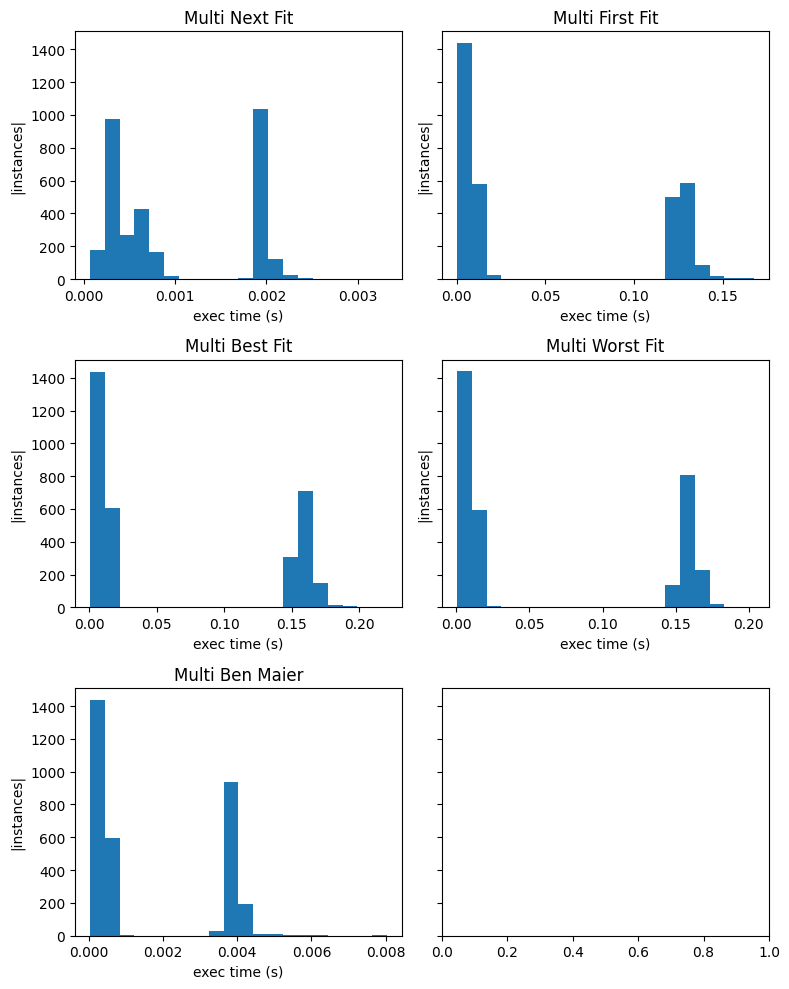

In [74]:
fig, axes = plt.subplots(3,2, sharex = False, sharey= True)
draw_hist(Multi_Next_Fit, "Multi Next Fit", axes[0, 0]) 
draw_hist(Multi_First_Fit, "Multi First Fit", axes[0, 1]) 
draw_hist(Multi_Best_Fit, "Multi Best Fit", axes[1, 0])
draw_hist(Multi_Worst_Fit, "Multi Worst Fit", axes[1, 1])
draw_hist(Multi_Baseline, "Multi Ben Maier", axes[2, 0])
fig.set_size_inches(8,10)
fig.tight_layout()
fig.savefig('outputs/histogram_Multiway.pdf')

In [75]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

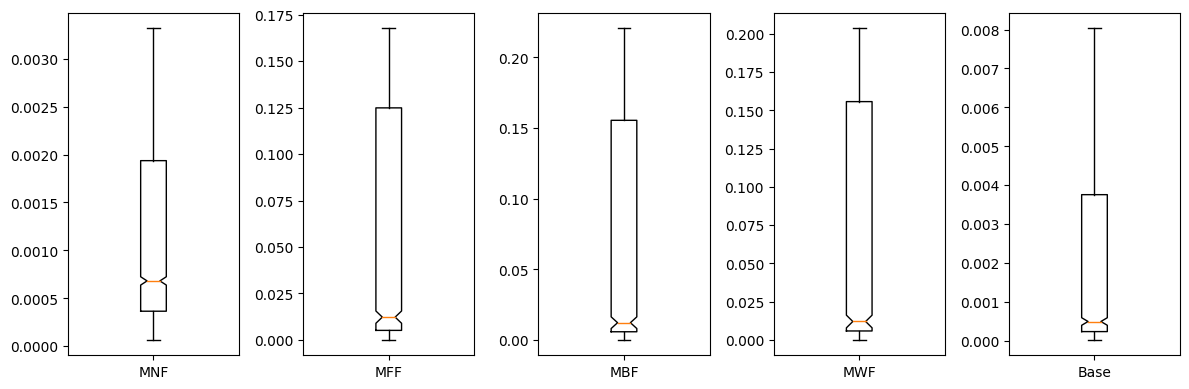

In [76]:
fig, ax = plt.subplots(1,5)

plot_box([Multi_Next_Fit],['MNF'], ax[0])
plot_box([Multi_First_Fit],['MFF'], ax[1])
plot_box([Multi_Best_Fit],['MBF'], ax[2])
plot_box([Multi_Worst_Fit],['MWF'], ax[3])
plot_box([Multi_Baseline],['Base'], ax[4])

fig.set_size_inches(12,4)
fig.tight_layout()
fig.savefig('outputs/boxplot_multi.pdf')

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

##### *Hassan*
  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

##### *Sevhena*
  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)